In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0498ac92601ffcb50b3a64830b1b8375


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | wasilla
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | sycow
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | lovozero
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | gudari
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | grand gaube
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | domoni
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | biskupiec
Processing Record 20 of Set 1 | alta floresta
Processing Record 21 of Set 1 | kahulu

Processing Record 36 of Set 4 | laon
Processing Record 37 of Set 4 | changji
Processing Record 38 of Set 4 | sept-iles
Processing Record 39 of Set 4 | nanortalik
Processing Record 40 of Set 4 | lugovskiy
City not found. Skipping...
Processing Record 41 of Set 4 | salta
Processing Record 42 of Set 4 | beruwala
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | sao gabriel da cachoeira
Processing Record 47 of Set 4 | bonfim
Processing Record 48 of Set 4 | angoche
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | lorengau
Processing Record 1 of Set 5 | great falls
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | bunog
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | fare
Processing Record 7 of Set 5 | chepareria
Processing Record 8 of Set 5 | muroto
Processing Record 9 of Set

Processing Record 24 of Set 8 | nova granada
Processing Record 25 of Set 8 | manokwari
Processing Record 26 of Set 8 | vidim
Processing Record 27 of Set 8 | kazanka
Processing Record 28 of Set 8 | cardenas
Processing Record 29 of Set 8 | finnsnes
Processing Record 30 of Set 8 | vila franca do campo
Processing Record 31 of Set 8 | mar de espanha
Processing Record 32 of Set 8 | la baule-escoublac
Processing Record 33 of Set 8 | yulin
Processing Record 34 of Set 8 | takoradi
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | san policarpo
Processing Record 37 of Set 8 | gurskoye
City not found. Skipping...
Processing Record 38 of Set 8 | caravelas
Processing Record 39 of Set 8 | huntington
Processing Record 40 of Set 8 | kainantu
Processing Record 41 of Set 8 | silyanah
City not found. Skipping...
Processing Record 42 of Set 8 | yeppoon
Processing Record 43 of Set 8 | muyezerskiy
Processing Record 44 of Set 8 | tarrafal
Processing Record 45 of Set 8 | onega
Processing Re

City not found. Skipping...
Processing Record 8 of Set 12 | jurmala
Processing Record 9 of Set 12 | inuvik
Processing Record 10 of Set 12 | langres
Processing Record 11 of Set 12 | carolina
Processing Record 12 of Set 12 | axim
Processing Record 13 of Set 12 | ossora
Processing Record 14 of Set 12 | ngunguru
Processing Record 15 of Set 12 | dehri
Processing Record 16 of Set 12 | dalhousie
Processing Record 17 of Set 12 | atambua
Processing Record 18 of Set 12 | adre
Processing Record 19 of Set 12 | tura
Processing Record 20 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 21 of Set 12 | sault sainte marie
Processing Record 22 of Set 12 | nenjiang
Processing Record 23 of Set 12 | urubicha
Processing Record 24 of Set 12 | vanimo
Processing Record 25 of Set 12 | shingu
Processing Record 26 of Set 12 | oliver
Processing Record 27 of Set 12 | barsukovskaya
Processing Record 28 of Set 12 | bereda
Processing Record 29 of Set 12 | jinchang
Processing Record 30 of Set 12 | kh

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wasilla,61.58,-149.44,42.01,77,90,3.78,US,2020-04-15 14:26:23
1,Carnarvon,-24.87,113.63,75.20,78,40,17.22,AU,2020-04-15 14:30:10
2,Sycow,51.31,17.72,57.20,51,37,21.92,PL,2020-04-15 14:30:10
3,Hithadhoo,-0.60,73.08,85.30,70,92,8.52,MV,2020-04-15 14:30:10
4,Lovozero,68.00,35.01,32.49,88,100,4.59,RU,2020-04-15 14:30:11
5,Hilo,19.73,-155.09,71.60,78,20,5.82,US,2020-04-15 14:28:10
6,Punta Arenas,-53.15,-70.92,51.80,81,99,4.56,CL,2020-04-15 14:30:11
7,Khatanga,71.97,102.50,-7.13,89,0,3.98,RU,2020-04-15 14:30:11
8,Port Alfred,-33.59,26.89,66.99,89,65,1.99,ZA,2020-04-15 14:30:12
9,Gudari,19.35,83.78,86.29,36,59,3.24,IN,2020-04-15 14:30:12


In [11]:
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_data_order]

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

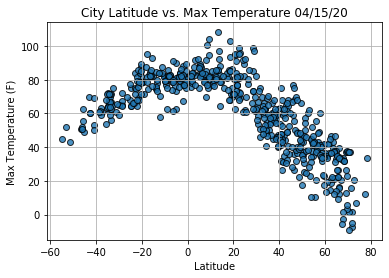

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

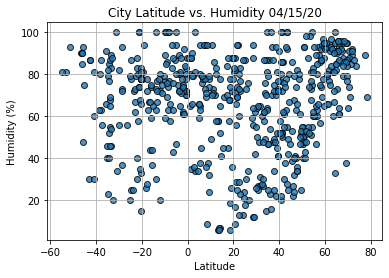

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

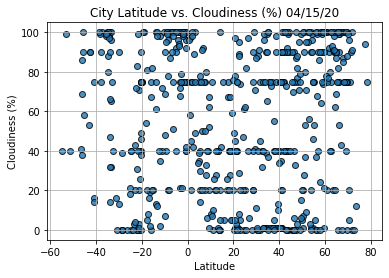

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

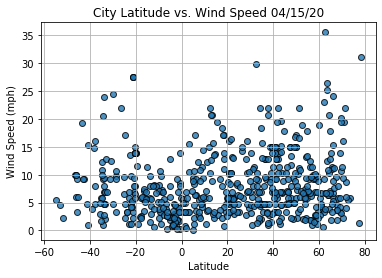

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

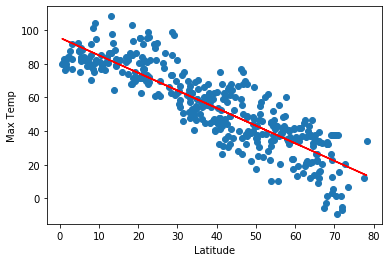

<Figure size 432x288 with 0 Axes>

In [20]:
# Northern hemisphere regression line and scatter plot for lat vs. Max Temp.
N_max_temp_x_Series = northern_hemi_df['Lat']
N_max_temp_y_Series = northern_hemi_df['Max Temp']
# call function: plot_linear_function 
plot_linear_regression(N_max_temp_x_Series, 
                N_max_temp_y_Series, 
                'Linear Regression on the Northern Humisphere \n for Maximun Temperature',
                'Max Temp', (10,-40))
plt.savefig('weather_data/Regress_fig1.png')
plt.show()

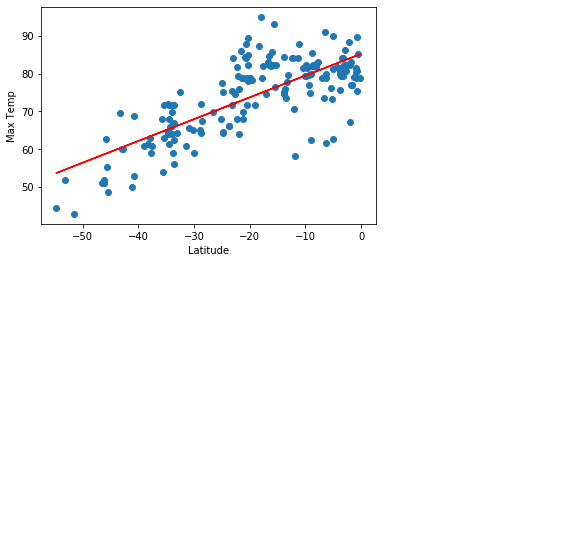

<Figure size 432x288 with 0 Axes>

In [21]:
# Northern hemisphere regression line and scatter plot for lat vs. Max Temp.
S_max_temp_x_Series = southern_hemi_df['Lat']
S_max_temp_y_Series = southern_hemi_df['Max Temp']
# call function: plot_linear_function 
plot_linear_regression(S_max_temp_x_Series, 
                S_max_temp_y_Series, 
                'Linear Regression on the Southern Humisphere \n for Maximun Temperature',
                'Max Temp', (10,-40))
plt.savefig('weather_data/Regress_fig2.png')
plt.show()

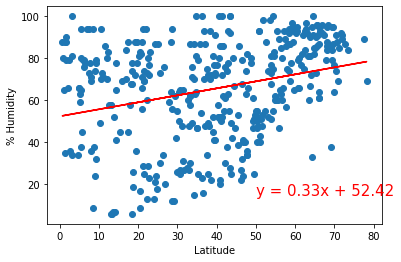

<Figure size 432x288 with 0 Axes>

In [22]:
# build the Northern hemisphere regression line and scatter plot for lat vs. Humidity.
N_humidity_x_Series = northern_hemi_df['Lat']
N_humidity_y_Series = northern_hemi_df['Humidity']
# call function: plot_linear_function 
plot_linear_regression(N_humidity_x_Series, 
                N_humidity_y_Series, 
                'Linear Regression on the Northern Humisphere \n for % Humidity',
                '% Humidity', (50,15))
plt.savefig('weather_data/Regress_fig3.png')
plt.show()

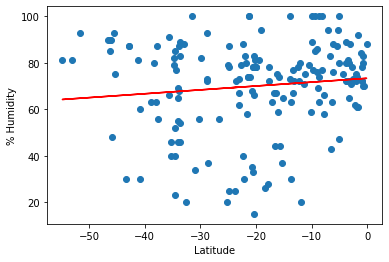

<Figure size 432x288 with 0 Axes>

In [23]:
# build the Southern hemisphere regression line and scatter plot for lat vs. Humidity.
S_humidity_x_Series = southern_hemi_df['Lat']
S_humidity_y_Series = southern_hemi_df['Humidity']
# call function: plot_linear_function 
plot_linear_regression(S_humidity_x_Series, 
                S_humidity_y_Series, 
                'Linear Regression on the Southern Humisphere \n for % Humidity',
                '% Humidity', (-55,10))
plt.savefig('weather_data/Regress_fig4.png')
plt.show()

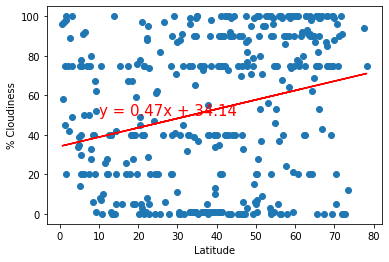

<Figure size 432x288 with 0 Axes>

In [24]:
# build the Northern hemisphere regression line and scatter plot for lat vs. Cloudiness.
N_Cloudiness_x_Series = northern_hemi_df['Lat']
N_Cloudiness_y_Series = northern_hemi_df['Cloudiness']
# call function: plot_linear_function 
plot_linear_regression(N_Cloudiness_x_Series, 
                N_Cloudiness_y_Series, 
                'Linear Regression on the Northern Humisphere \n for % Cloudiness',
                '% Cloudiness', (10,50))
plt.savefig('weather_data/Regress_fig5.png')
plt.show()

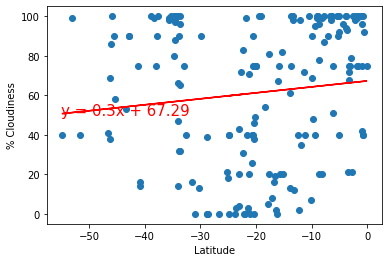

<Figure size 432x288 with 0 Axes>

In [25]:
# build the Southern hemisphere regression line and scatter plot for lat vs. Cloudiness.
S_Cloudiness_x_Series = southern_hemi_df['Lat']
S_Cloudiness_y_Series = southern_hemi_df['Cloudiness']
# call function: plot_linear_function 
plot_linear_regression(S_Cloudiness_x_Series, 
                S_Cloudiness_y_Series, 
                'Linear Regression on the Southern Humisphere \n for % Cloudiness',
                '% Cloudiness', (-55,50))
plt.savefig('weather_data/Regress_fig6.png')
plt.show()

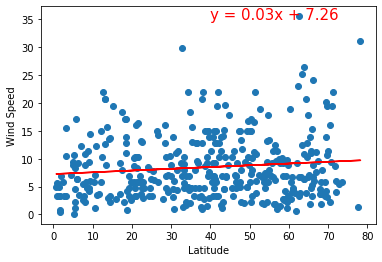

<Figure size 432x288 with 0 Axes>

In [26]:
# build the Northern hemisphere regression line and scatter plot for lat vs. Wind Speed.
N_WindSpeed_x_Series = northern_hemi_df['Lat']
N_WindSpeed_y_Series = northern_hemi_df['Wind Speed']
# call function: plot_linear_function 
plot_linear_regression(N_WindSpeed_x_Series, 
                N_WindSpeed_y_Series, 
                'Linear Regression on the Northern Humisphere \n for Wind Speed',
                'Wind Speed', (40,35))
plt.savefig('weather_data/Regress_fig7.png')
plt.show()

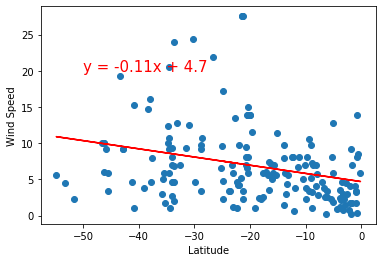

<Figure size 432x288 with 0 Axes>

In [27]:
# build the Southern hemisphere regression line and scatter plot for lat vs. Wind Speed.
S_WindSpeed_x_Series = southern_hemi_df['Lat']
S_WindSpeed_y_Series = southern_hemi_df['Wind Speed']
# call function: plot_linear_function 
plot_linear_regression(S_WindSpeed_x_Series, 
                S_WindSpeed_y_Series, 
                'Linear Regression on the Southern Humisphere \n for Wind Speed',
                'Wind Speed', (-50,20))
plt.savefig('weather_data/Regress_fig8.png')
plt.show()


In [28]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [29]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Carnarvon,AU,2020-04-15 14:30:10,-24.87,113.63,75.20,78,40,17.22
3,Hithadhoo,MV,2020-04-15 14:30:10,-0.60,73.08,85.30,70,92,8.52
9,Gudari,IN,2020-04-15 14:30:12,19.35,83.78,86.29,36,59,3.24
11,Grand Gaube,MU,2020-04-15 14:30:12,-20.01,57.66,78.80,78,75,13.87
13,Domoni,KM,2020-04-15 14:30:13,-12.26,44.53,84.00,72,2,8.12
16,Alta Floresta,BR,2020-04-15 14:30:14,-9.88,-56.09,82.40,100,90,2.24
18,Rikitea,PF,2020-04-15 14:26:46,-23.12,-134.97,75.36,67,43,1.21
20,Masunga,BW,2020-04-15 14:30:15,-20.62,27.45,87.80,33,40,6.93
21,Arraial Do Cabo,BR,2020-04-15 14:25:39,-22.97,-42.03,84.20,62,20,5.82
35,Bengkulu,ID,2020-04-15 14:30:19,-3.80,102.27,79.77,80,100,2.39


In [30]:
preferred_cities_df.count()

City          177
Country       177
Date          177
Lat           177
Lng           177
Max Temp      177
Humidity      177
Cloudiness    177
Wind Speed    177
dtype: int64

In [34]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Carnarvon,AU,75.20,-24.87,113.63,
3,Hithadhoo,MV,85.30,-0.60,73.08,
9,Gudari,IN,86.29,19.35,83.78,
11,Grand Gaube,MU,78.80,-20.01,57.66,
13,Domoni,KM,84.00,-12.26,44.53,
16,Alta Floresta,BR,82.40,-9.88,-56.09,
18,Rikitea,PF,75.36,-23.12,-134.97,
20,Masunga,BW,87.80,-20.62,27.45,
21,Arraial Do Cabo,BR,84.20,-22.97,-42.03,
35,Bengkulu,ID,79.77,-3.80,102.27,


In [49]:
from config import g_key
import gmaps

In [50]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [51]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, n\
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

SyntaxError: invalid syntax (<ipython-input-51-773aa83b1051>, line 6)

In [52]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [53]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))